In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

#from tensorflow.keras import layers
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Conv2DTranspose
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model


In [2]:
def preprocess(array):
    """
    Normalizes the supplied array and reshapes it into the appropriate format.
    """

    array = array.astype("float32") / 255.0
    array = np.reshape(array, (len(array), 28, 28, 1))
    return array


def noise(array):
    """
    Adds random noise to each image in the supplied array.
    """

    noise_factor = 0.4
    noisy_array = array + noise_factor * np.random.normal(
        loc=0.0, scale=1.0, size=array.shape
    )

    return np.clip(noisy_array, 0.0, 1.0)


def display(array1, array2):
    """
    Displays ten random images from each one of the supplied arrays.
    """

    n = 10

    indices = np.random.randint(len(array1), size=n)
    images1 = array1[indices, :]
    images2 = array2[indices, :]

    plt.figure(figsize=(20, 4))
    for i, (image1, image2) in enumerate(zip(images1, images2)):
        ax = plt.subplot(2, n, i + 1)
        plt.imshow(image1.reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        ax = plt.subplot(2, n, i + 1 + n)
        plt.imshow(image2.reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

    plt.show()

In [3]:
# Since we only need images from the dataset to encode and decode, we
# won't use the labels.
(train_data, _), (test_data, _) = mnist.load_data()

# Normalize and reshape the data
train_data = preprocess(train_data)
test_data = preprocess(test_data)

# Create a copy of the data with added noise
noisy_train_data = noise(train_data)
noisy_test_data = noise(test_data)


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


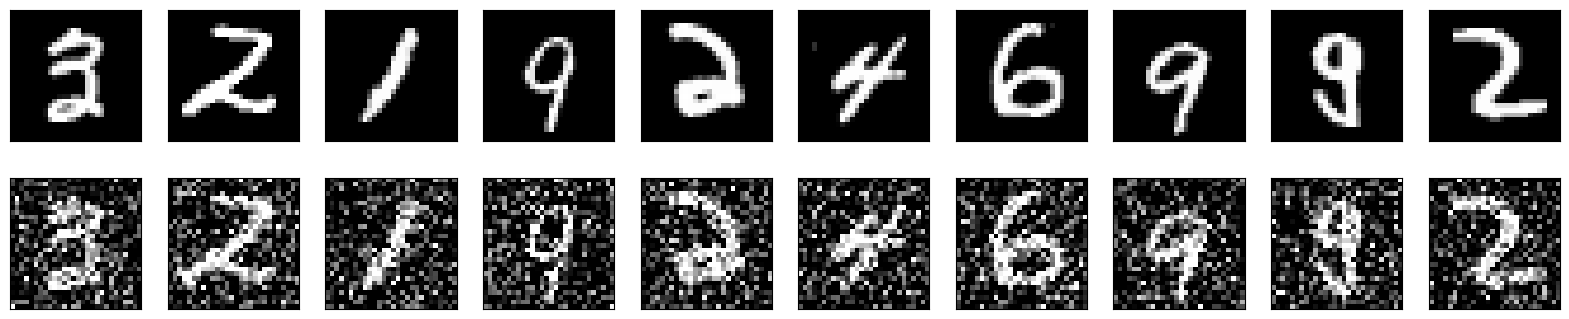

In [4]:
# Display the train data and a version of it with added noise
display(train_data, noisy_train_data)

In [5]:
input = Input(shape=(28, 28, 1))

# Encoder
x = Conv2D(32, (3, 3), activation="relu", padding="same")(input)
x = MaxPooling2D((2, 2), padding="same")(x)
x = Conv2D(32, (3, 3), activation="relu", padding="same")(x)
x = MaxPooling2D((2, 2), padding="same")(x)

In [6]:
# Decoder
x = Conv2DTranspose(32, (3, 3), strides=2, activation="relu", padding="same")(x)
x = Conv2DTranspose(32, (4, 4), strides=2, activation="relu", padding="same")(x)
x = Conv2D(1, (3, 3), activation="sigmoid", padding="same")(x)

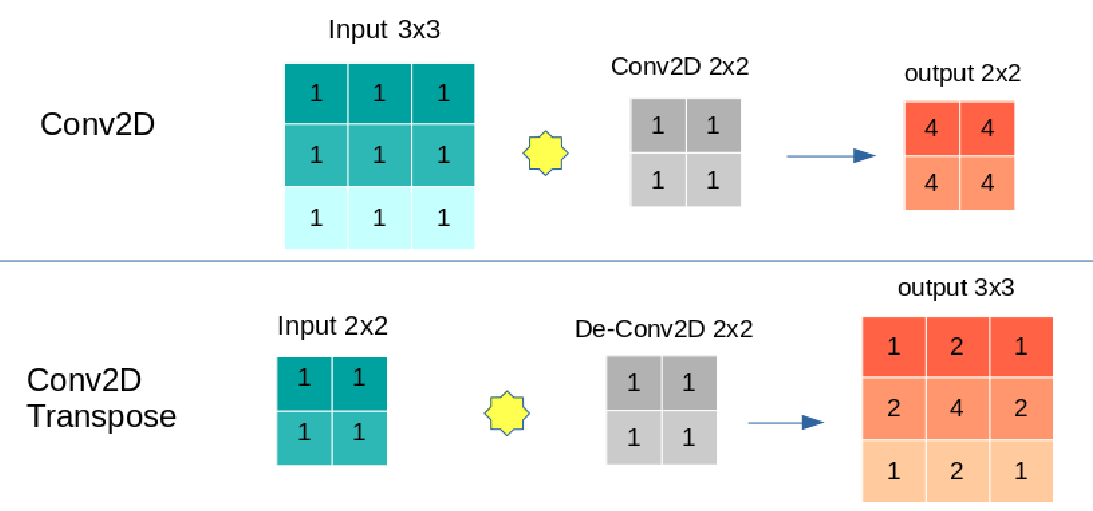

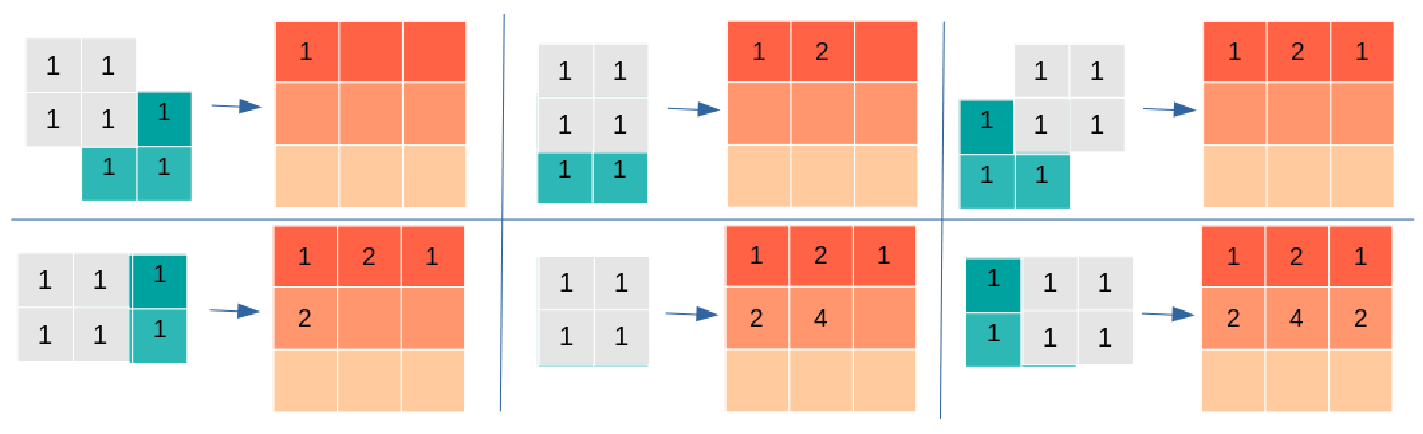

In [7]:
# Autoencoder
autoencoder = Model(input, x)
autoencoder.compile(optimizer="adam", loss="binary_crossentropy")
autoencoder.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 14, 14, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose                │ (None, 14, 14, 32)     │         9,248 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_1              │ (None, 28, 28, 32)     │        16,416 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 1)      │           289 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 35,521 (138.75 KB)

 Trainable params: 35,521 (138.75 KB)

 Non-trainable params: 0 (0.00 B)

In [8]:
autoencoder.fit(
    x=noisy_train_data,
    y=train_data,
    epochs=100,
    batch_size=128,
    shuffle=True,
    validation_data=(noisy_test_data, test_data),
)

Epoch 1/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 12s 13ms/step - loss: 0.2809 - val_loss: 0.1010
Epoch 2/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 0.1003 - val_loss: 0.0954
Epoch 3/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 0.0955 - val_loss: 0.0929
Epoch 4/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 0.0931 - val_loss: 0.0912
Epoch 5/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0915 - val_loss: 0.0901
Epoch 6/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 0.0905 - val_loss: 0.0892
Epoch 7/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0896 - val_loss: 0.0885
Epoch 8/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 0.0890 - val_loss: 0.0881
Epoch 9/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 0.0883 - val_loss: 0.0876
Epoch 10/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - loss: 0.0881 - val_loss: 0.0872
Epoch 11/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0877 - val_loss: 0.0871
Epoch 12/100
469/469 ━━━━━━━━━━━━━━━━━━

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


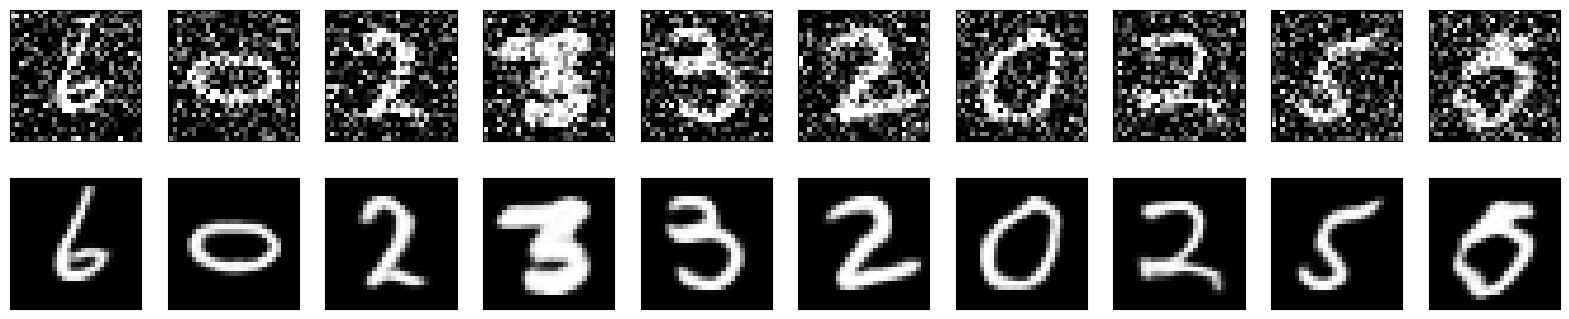

In [9]:
predictions = autoencoder.predict(noisy_test_data)
display(noisy_test_data, predictions)